# Cat or dog neural network recognition

## Loading images and resizing the data

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
import random
import pickle 
%matplotlib inline

In [33]:
datadir = r"./cats_or_dogs_dataset/"
categories = ["Dog","Cat"]

In [34]:
training_data  = []
IMG_SIZE = 100


def create_training_data():
    """
    This function loops through the set of pictures for each category (dog or cat), reads it in gray scale and resize it to
    have an homogeneus set of images to analyze (of 100p x 100p)
    """
    for category in categories:
        path = os.path.join(datadir, category) # path for dogs or cats
        class_num = categories.index(category) # 1 is cats, 0 dogs for last run at least
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

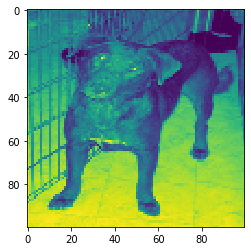

In [35]:
# Showing an example
plt.imshow(training_data[1][0])
plt.show()

In [36]:
# to cross check the label has been correctly assigned ( 1 cats, 0 dogs)
print(training_data[1][1])

0


In [38]:
#Randomly shuffling the data is important to not create wrong patterns recognition in the NN 
random.shuffle(training_data)

In [39]:
X = []
y = []

# We construct the features matrix X and the label vector y based on the training data, which consists of a 2D Lists
# (features, label)
for features, label in training_data:
    X.append(features)
    y.append(label)
    
""" 
Reshaping the features Matrix, as we cannot pass a list of features. Instead, we have to pass a tensor
(or array in numpy terms) with (n, 100, 100, 1) dimensions, where n is the number of pictures.

"""
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [49]:
"""
This usage of pickle is to store the data so we don't have to be loading it each time we run anything on this modeling.
This fasten then processing of data and also assures us that the data is always loaded each time the same way 
(same order and so on)
"""
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [50]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

# Training the model

In [11]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [15]:
X_train = tf.keras.utils.normalize(X_train, axis= 1)
X_test = tf.keras.utils.normalize(X_test, axis= 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = X_train.shape[1:]))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

model.compile(optimizer= 'adam', 
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy']
             )

model.fit(X_train, y_train, epochs=35)

Epoch 1/35
   96/17462 [..............................] - ETA: 28s - loss: 2.9599 - acc: 0.3229    

KeyboardInterrupt: 

In [13]:
val_loss, val_acc = model.evaluate(X_test, y_test)

print(val_loss, val_acc )

7484/7484 [==============================] - 3s 408us/sample - loss: 0.6932 - acc: 0.5023s - loss:
0.6931508287652045 0.50227153


In [41]:
model.save('cats_and_dogs.model')

In [20]:
new_model = tf.keras.models.load_model('cats_and_dogs.model')

In [21]:
predictions = new_model.predict([X_test])

In [27]:
print(X_test[1].shape)

(100, 100, 1)


In [63]:
print(np.argmax(predictions[5000]))

0


In [60]:
X_aux = X_test[5000][0:100,0:100,0]
print(X_aux.shape)

(100, 100)


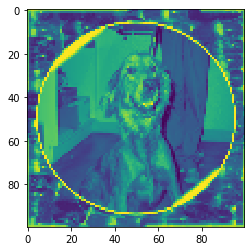

In [64]:
plt.imshow(X_aux)
plt.show()

In [73]:
mi_perro = cv2.imread("C:/DS_python/cats_dogs_dataset/mifoca.jpeg", cv2.IMREAD_GRAYSCALE)
mi_perro_next = cv2.resize(mi_perro, (IMG_SIZE,IMG_SIZE))


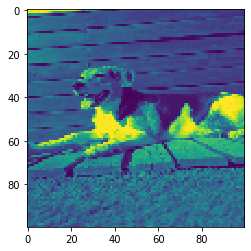

In [74]:
plt.imshow(mi_perro_next)
plt.show()

In [76]:
mi_perro_arr = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
prediction_my_dog = new_model.predict([mi_perro_arr])

In [77]:
print(np.argmax(prediction_my_dog[0]))

0
